# Питер и волк: Введение в обучение с подкреплением

В этом уроке мы научимся применять обучение с подкреплением к задаче поиска пути. Сюжет вдохновлен музыкальной сказкой [«Петя и волк»](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) русского композитора [Сергея Прокофьева](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Это история о юном пионере Пете, который смело выходит из дома на лесную поляну, чтобы поймать волка. Мы будем обучать алгоритмы машинного обучения, которые помогут Пете исследовать окружающую местность и построить оптимальную карту навигации.

Сначала импортируем несколько полезных библиотек:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Обзор обучения с подкреплением

**Обучение с подкреплением** (Reinforcement Learning, RL) — это метод обучения, который позволяет нам изучать оптимальное поведение **агента** в некоторой **среде** путем проведения множества экспериментов. Агент в этой среде должен иметь какую-то **цель**, определяемую с помощью **функции вознаграждения**.

## Среда

Для простоты представим, что мир Питера — это квадратное поле размером `width` x `height`. Каждая ячейка на этом поле может быть:
* **землей**, по которой Питер и другие существа могут ходить
* **водой**, по которой, очевидно, ходить нельзя
* **деревом** или **травой** — местом, где можно отдохнуть
* **яблоком**, которое символизирует что-то, что Питер будет рад найти, чтобы подкрепиться
* **волком**, который опасен и которого следует избегать

Для работы со средой мы определим класс `Board`. Чтобы не перегружать эту записную книжку, весь код для работы с полем был вынесен в отдельный модуль `rlboard`, который мы сейчас импортируем. Вы можете заглянуть в этот модуль, чтобы узнать больше о внутренней реализации.


Давайте теперь создадим случайную доску и посмотрим, как она выглядит:


In [4]:
# code block 1

## Действия и Политика

В нашем примере цель Питера — найти яблоко, избегая волка и других препятствий. Определите эти действия в виде словаря и сопоставьте их с парами соответствующих изменений координат.


In [5]:
# code block 2

Стратегия нашего агента (Питера) определяется так называемой **политикой**. Рассмотрим самую простую политику, называемую **случайное блуждание**.

## Случайное блуждание

Давайте сначала решим нашу задачу, реализовав стратегию случайного блуждания.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Функция вознаграждения

Чтобы сделать нашу стратегию более умной, нам нужно понять, какие ходы "лучше" других.


In [8]:
#code block 5

## Q-Learning

Создайте Q-таблицу или многомерный массив. Поскольку наша доска имеет размеры `width` x `height`, мы можем представить Q-таблицу в виде numpy массива с формой `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Передайте Q-таблицу в функцию `plot`, чтобы визуализировать таблицу на доске:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Суть Q-Learning: Уравнение Беллмана и алгоритм обучения

Напишите псевдокод для нашего алгоритма обучения:

* Инициализируйте Q-таблицу Q одинаковыми значениями для всех состояний и действий
* Установите скорость обучения $\alpha\leftarrow 1$
* Повторяйте симуляцию много раз
   1. Начните с случайной позиции
   1. Повторяйте
        1. Выберите действие $a$ в состоянии $s$
        2. Выполните действие, перейдя в новое состояние $s'$
        3. Если мы достигаем условия окончания игры или общий награда слишком мала — завершите симуляцию  
        4. Вычислите награду $r$ в новом состоянии
        5. Обновите Q-функцию согласно уравнению Беллмана: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Обновите общую награду и уменьшите $\alpha$.

## Эксплуатация vs. Исследование

Лучший подход — это баланс между исследованием и эксплуатацией. По мере того как мы больше узнаем о нашей среде, мы будем чаще следовать оптимальному маршруту, однако иногда стоит выбирать неизведанный путь.

## Реализация на Python

Теперь мы готовы реализовать алгоритм обучения. Перед этим нам также понадобится функция, которая преобразует произвольные числа в Q-таблице в вектор вероятностей для соответствующих действий:


In [10]:
# code block 7

Мы добавляем небольшое значение `eps` к исходному вектору, чтобы избежать деления на 0 в начальном случае, когда все компоненты вектора одинаковы.

Фактический алгоритм обучения, который мы будем запускать в течение 5000 экспериментов, также называемых **эпохами**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

После выполнения этого алгоритма Q-таблица должна быть обновлена значениями, которые определяют привлекательность различных действий на каждом шаге. Визуализируйте таблицу здесь:


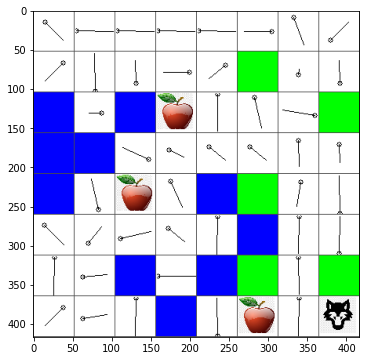

In [43]:
m.plot(Q)

## Проверка политики

Поскольку Q-Table содержит "привлекательность" каждого действия в каждом состоянии, его довольно легко использовать для определения эффективной навигации в нашем мире. В самом простом случае мы можем просто выбрать действие, соответствующее наибольшему значению в Q-Table:


In [13]:
# code block 9

2

Если вы попробуете код выше несколько раз, вы можете заметить, что иногда он просто "зависает", и вам нужно нажать кнопку STOP в ноутбуке, чтобы прервать выполнение.

> **Задача 1:** Измените функцию `walk`, чтобы ограничить максимальную длину пути определенным количеством шагов (например, 100), и наблюдайте, как код выше возвращает это значение время от времени.

> **Задача 2:** Измените функцию `walk`, чтобы она не возвращалась в места, где уже была ранее. Это предотвратит зацикливание `walk`, однако агент все равно может оказаться "запертым" в месте, из которого он не сможет выбраться.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


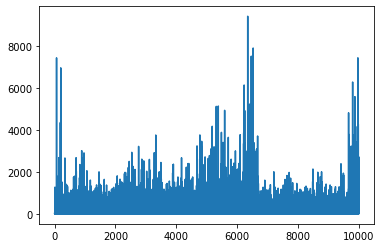

In [57]:
plt.plot(lpath)

## Упражнение
## Более реалистичный мир "Петя и волк"



---

**Отказ от ответственности**:  
Этот документ был переведен с помощью сервиса автоматического перевода [Co-op Translator](https://github.com/Azure/co-op-translator). Несмотря на наши усилия обеспечить точность, автоматические переводы могут содержать ошибки или неточности. Оригинальный документ на его исходном языке следует считать авторитетным источником. Для получения критически важной информации рекомендуется профессиональный перевод человеком. Мы не несем ответственности за любые недоразумения или неправильные интерпретации, возникшие в результате использования данного перевода.
